In [2]:
# Supress Warning

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
pd.set_option('display.max_columns', None)

## Step 1: Importing the Data

In [5]:
# Importing all the datasets

customer_data = pd.read_csv("customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [6]:
internet_data = pd.read_csv("internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [7]:
churn_data = pd.read_csv("churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df_1 = pd.merge(churn_data, customer_data, how="inner", on="customerID")

In [9]:
telecom = pd.merge(df_1, internet_data, how="inner", on="customerID")

## Step 2: Inspecting the data frame

In [10]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [11]:
telecom.shape

(7043, 21)

In [12]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [13]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [14]:
# Check if we have any duplicate data

telecom.duplicated().any()

False

In [15]:
# Checking the missing values

telecom.isna().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [16]:
# Total Charges column contain space, replacing it by nan

telecom.TotalCharges = telecom.TotalCharges.replace(" ", np.nan)

In [17]:
telecom.isna().sum()

customerID           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
dtype: int64

In [18]:
# Checking the % of data which is affected if we drop the nan total charges value

telecom["TotalCharges"].isna().sum()/len(telecom)*100

0.1561834445548772

In [19]:
# Dropping the null values

telecom.dropna(inplace=True)

In [20]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   tenure            7032 non-null   int64  
 2   PhoneService      7032 non-null   object 
 3   Contract          7032 non-null   object 
 4   PaperlessBilling  7032 non-null   object 
 5   PaymentMethod     7032 non-null   object 
 6   MonthlyCharges    7032 non-null   float64
 7   TotalCharges      7032 non-null   object 
 8   Churn             7032 non-null   object 
 9   gender            7032 non-null   object 
 10  SeniorCitizen     7032 non-null   int64  
 11  Partner           7032 non-null   object 
 12  Dependents        7032 non-null   object 
 13  MultipleLines     7032 non-null   object 
 14  InternetService   7032 non-null   object 
 15  OnlineSecurity    7032 non-null   object 
 16  OnlineBackup      7032 non-null   object 


In [21]:
# converting total charges to float

telecom.TotalCharges = telecom.TotalCharges.astype(float)

In [22]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   tenure            7032 non-null   int64  
 2   PhoneService      7032 non-null   object 
 3   Contract          7032 non-null   object 
 4   PaperlessBilling  7032 non-null   object 
 5   PaymentMethod     7032 non-null   object 
 6   MonthlyCharges    7032 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   Churn             7032 non-null   object 
 9   gender            7032 non-null   object 
 10  SeniorCitizen     7032 non-null   int64  
 11  Partner           7032 non-null   object 
 12  Dependents        7032 non-null   object 
 13  MultipleLines     7032 non-null   object 
 14  InternetService   7032 non-null   object 
 15  OnlineSecurity    7032 non-null   object 
 16  OnlineBackup      7032 non-null   object 


In [23]:
# Dropping customer Id as it is of no use

telecom.drop("customerID", axis=1, inplace=True)

In [24]:
print(telecom.OnlineSecurity.value_counts())
print('----------------------------------------------------')
print(telecom.OnlineBackup.value_counts())
print('----------------------------------------------------')
print(telecom.DeviceProtection.value_counts())
print('----------------------------------------------------')
print(telecom.TechSupport.value_counts())
print('----------------------------------------------------')
print(telecom.StreamingTV.value_counts())
print('----------------------------------------------------')
print(telecom.StreamingMovies.value_counts())
print('----------------------------------------------------')

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
----------------------------------------------------
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
----------------------------------------------------
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64
----------------------------------------------------
No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64
----------------------------------------------------
No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64
----------------------------------------------------
No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64
--------------------------

In [25]:
# Replacing all "No internet Service" with "No"

var_NoInternet = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

telecom[var_NoInternet]  = telecom[var_NoInternet].replace({"No internet service":"No"})

In [26]:
# checking the value count again

print(telecom.OnlineSecurity.value_counts())
print('----------------------------------------------------')
print(telecom.OnlineBackup.value_counts())
print('----------------------------------------------------')
print(telecom.DeviceProtection.value_counts())
print('----------------------------------------------------')
print(telecom.TechSupport.value_counts())
print('----------------------------------------------------')
print(telecom.StreamingTV.value_counts())
print('----------------------------------------------------')
print(telecom.StreamingMovies.value_counts())
print('----------------------------------------------------')

No     5017
Yes    2015
Name: OnlineSecurity, dtype: int64
----------------------------------------------------
No     4607
Yes    2425
Name: OnlineBackup, dtype: int64
----------------------------------------------------
No     4614
Yes    2418
Name: DeviceProtection, dtype: int64
----------------------------------------------------
No     4992
Yes    2040
Name: TechSupport, dtype: int64
----------------------------------------------------
No     4329
Yes    2703
Name: StreamingTV, dtype: int64
----------------------------------------------------
No     4301
Yes    2731
Name: StreamingMovies, dtype: int64
----------------------------------------------------


In [27]:
telecom.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [28]:
# Mapping Senior Citizen to "Yes" and "No"

telecom["SeniorCitizen"] = telecom.SeniorCitizen.replace({0:"No", 1:"Yes"})

In [29]:
# Cross Checking the data again

telecom.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,No,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,No,No,No,No,DSL,Yes,No,Yes,No,No,No
2,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,No,No,No,No,DSL,Yes,Yes,No,No,No,No
3,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,No,No,No,No,Fiber optic,No,No,No,No,No,No


In [30]:
# Checking the Target Variable

telecom.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

## Step 3: Data Visualization

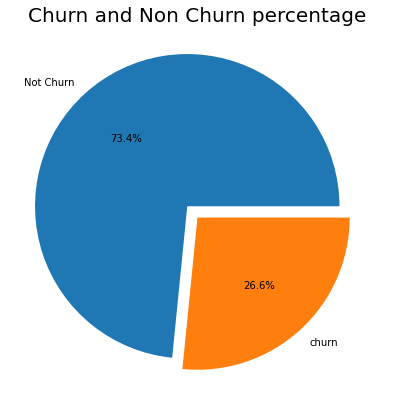

In [31]:
# Checking out of the total customer, what is the percentage of churn customer

per_churn = telecom.Churn.value_counts()

plt.figure(figsize=(10,7))
plt.pie(per_churn, labels=("Not Churn","churn"), explode=[0.1,0] ,autopct="%1.1f%%")

plt.title("Churn and Non Churn percentage", fontsize=20)
plt.show()

#### Categorical Variables

In [32]:
# Mapping "churn" to 0 and 1

telecom.Churn = telecom.Churn.replace({0:"No", 1:"Yes"})

In [33]:
telecom.select_dtypes(include="object").columns

Index(['PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

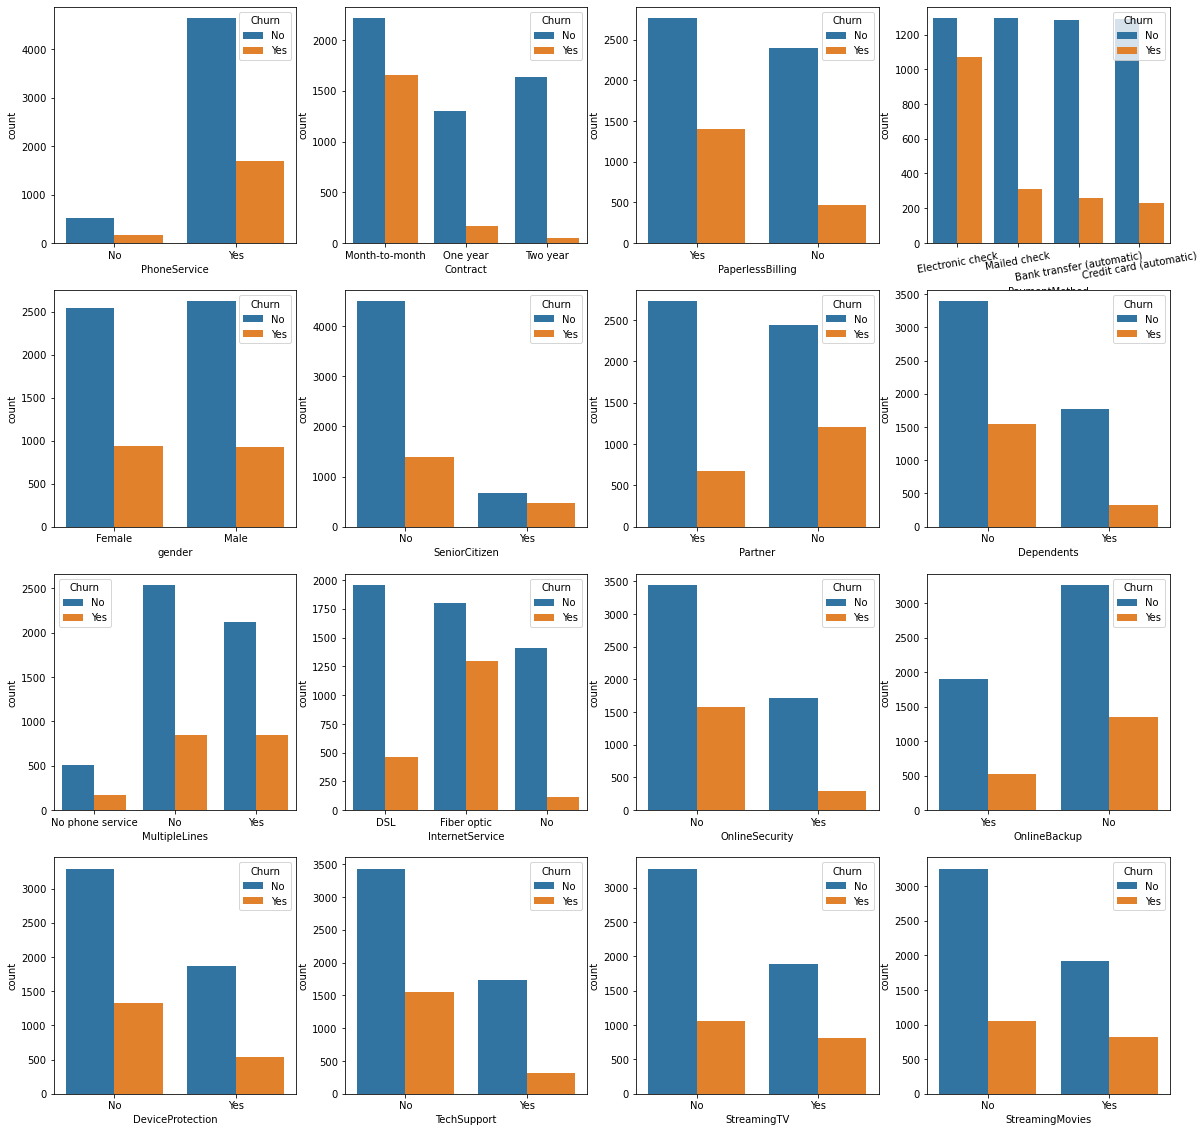

In [34]:
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
sns.countplot(data=telecom, x="PhoneService", hue="Churn")

plt.subplot(4,4,2)
sns.countplot(data=telecom, x="Contract", hue="Churn")

plt.subplot(4,4,3)
sns.countplot(data=telecom, x="PaperlessBilling", hue="Churn")

plt.subplot(4,4,4)
sns.countplot(data=telecom, x="PaymentMethod", hue="Churn")
plt.xticks(rotation=10)
    
plt.subplot(4,4,5)
sns.countplot(data=telecom, x="gender", hue="Churn")
        
plt.subplot(4,4,6)
sns.countplot(data=telecom, x="SeniorCitizen", hue="Churn")

plt.subplot(4,4,7)
sns.countplot(data=telecom, x="Partner", hue="Churn")

plt.subplot(4,4,8)
sns.countplot(data=telecom, x="Dependents", hue="Churn")

plt.subplot(4,4,9)
sns.countplot(data=telecom, x="MultipleLines", hue="Churn")

plt.subplot(4,4,10)
sns.countplot(data=telecom, x="InternetService", hue="Churn")

plt.subplot(4,4,11)
sns.countplot(data=telecom, x="OnlineSecurity", hue="Churn")

plt.subplot(4,4,12)
sns.countplot(data=telecom, x="OnlineBackup", hue="Churn")

plt.subplot(4,4,13)
sns.countplot(data=telecom, x="DeviceProtection", hue="Churn")

plt.subplot(4,4,14)
sns.countplot(data=telecom, x="TechSupport", hue="Churn")

plt.subplot(4,4,15)
sns.countplot(data=telecom, x="StreamingTV", hue="Churn")

plt.subplot(4,4,16)
sns.countplot(data=telecom, x="StreamingMovies", hue="Churn")

plt.show()
        

#### Conclusion - 

* Phone Service - There are more people with a phone service and almost half of them are churn customer.
* Paperless Billing - Citizen who are using paperless billing are likely to churn more.
* Payment Method - Most people are using Electronic Check to make the payment and they are the one who churn the most.
* Gender - Percentage of churn is not affected by gender. Hence, it is a not important feature.
* Senior Citizen - As per the above plot, churn rate of young citizen are more than the senior citizen.
* Partner - Single citizen have more intension to churn.
* Dependents - Citizen with no dependents are churning more.
* Multiplelines - Multiplelines doesn't show much effect on the churn percentage.
* Internet Service - There are many more people who has an internet service either with DSL or fiber but there is a large proportion of people with fiber optic internet service who churn.
* Online Security - Most people are not using online security and they are likely to churn the most.
* Online Backup - Most people are not using online backup and they are likely to churn the most.
* Device Protection - Most people are not using Device Protection service and they are likely to churn the most.
* Tech Support - Most people are not using Tech Support and the person who are using Tech Support are churning less.
* Streaming TV and Streaming Movies - Doesn't show much impact on the churn ratio.

#### Numerical Variables

In [35]:
num_var = telecom.select_dtypes(exclude="object").columns
num_var

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

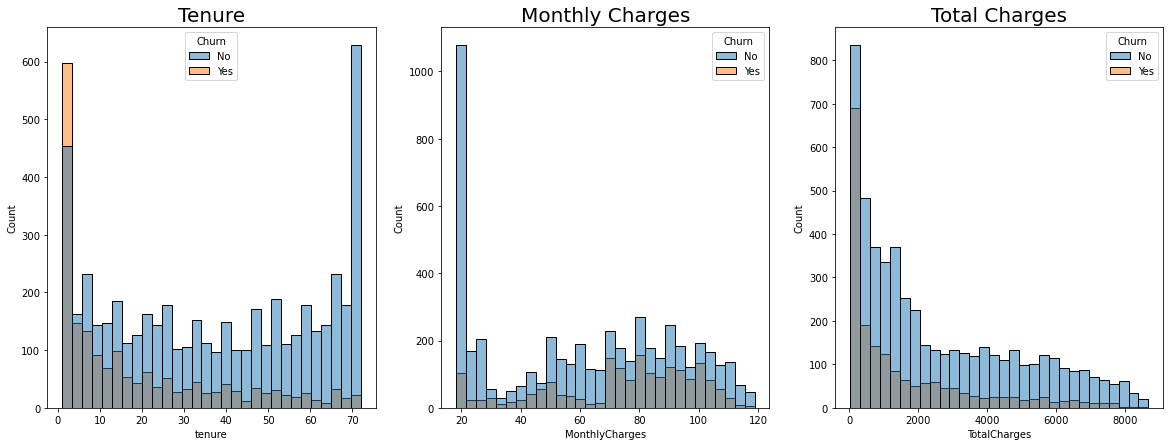

In [36]:
plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
sns.histplot(data=telecom, x="tenure", hue="Churn", bins=30)
plt.title("Tenure", fontsize=20)

plt.subplot(1,3,2)
sns.histplot(data=telecom, x="MonthlyCharges", hue="Churn", bins=30)
plt.title("Monthly Charges", fontsize=20)

plt.subplot(1,3,3)
sns.histplot(data=telecom, x="TotalCharges", hue="Churn", bins=30)
plt.title("Total Charges", fontsize=20)

plt.show()

#### Conclusion -

* As the tenure increases, th churn ratio decreases.
* Monthly charges shows fluctation in the churn rate.
* Total charges seems to be important feature, as the total charges increases the churn rate is almost null.

#### Checking outliers

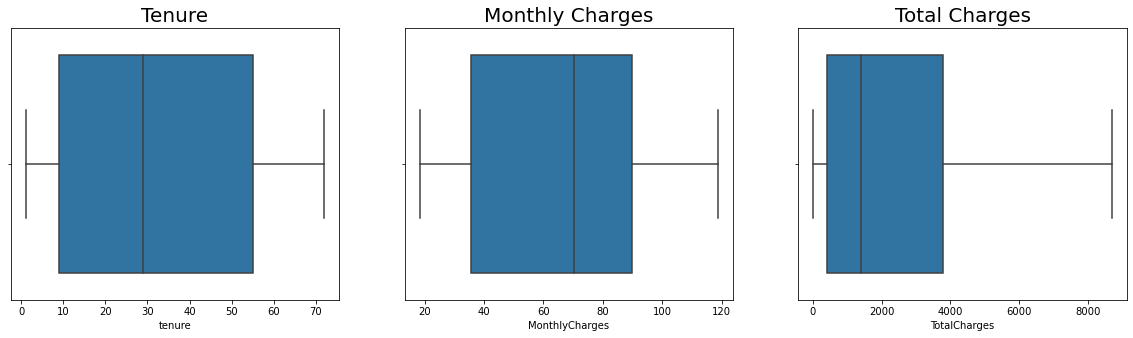

In [37]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.boxplot(data=telecom, x="tenure")
plt.title("Tenure", fontsize=20)

plt.subplot(1,3,2)
sns.boxplot(data=telecom, x="MonthlyCharges")
plt.title("Monthly Charges", fontsize=20)

plt.subplot(1,3,3)
sns.boxplot(data=telecom, x="TotalCharges")
plt.title("Total Charges", fontsize=20)

plt.show()

In [38]:
num_telecom = telecom[num_var]
num_telecom.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [39]:
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
90%,69.000000,102.645000,5976.640000
95%,72.000000,107.422500,6923.590000
99%,72.000000,114.734500,8039.883000


#### Conclusion

From the above distribution, you can see that the data doesn't contain any outlier.

## Step 4: Data Prepration

#### Changing all the Yes/No to 1 and 0

In [40]:

varlist = ["PhoneService", "PaperlessBilling", "Churn", "Partner", "Dependents", 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies',"SeniorCitizen"]

def binary_map(x):
    return x.map({"Yes":1, "No":0})

telecom[varlist] =telecom[varlist].apply(binary_map)

In [41]:
telecom.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,0,1,0,0,0,0
1,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,0,0,0,No,DSL,1,0,1,0,0,0
2,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,1,1,0,0,0,0
3,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,1,0,1,1,0,0
4,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,0,0,0,0,0,0


#### Creating dummies for categorical variables with multiple levels

In [42]:
dumm_var = ["Contract", "PaymentMethod", "gender", "MultipleLines", "InternetService"]

dummy1 = pd.get_dummies(telecom[dumm_var], drop_first=True)
dummy1.head()

,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No
0,0,0,0,1,0,0,1,0,0,0
1,1,0,0,0,1,1,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0
3,1,0,0,0,0,1,1,0,0,0
4,0,0,0,1,0,0,0,0,1,0


In [43]:
telecom = pd.concat([telecom, dummy1], axis=1)
telecom.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No
0,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,0,0,0,No,DSL,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0
2,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0
4,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [44]:
telecom.drop(dumm_var, axis=1, inplace=True)

In [45]:
telecom.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No
0,1,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,34,1,0,56.95,1889.50,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0
2,2,1,1,53.85,108.15,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3,45,0,0,42.30,1840.75,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0
4,2,1,1,70.70,151.65,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


## Step 5 :Train-Test Split

In [46]:
# Dividing data into X and y

X = telecom.drop("Churn", axis=1)
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No
0,1,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0
2,2,1,1,53.85,108.15,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0
4,2,1,1,70.70,151.65,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [47]:
y = telecom.Churn
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [48]:
#Spliting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=100)

## Step 6: Feature Scaling

In [49]:
scaler = StandardScaler()

In [50]:
# Scaling the train data

X_train[["tenure", "MonthlyCharges", "TotalCharges"]] = scaler.fit_transform(X_train[["tenure", "MonthlyCharges", "TotalCharges"]])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,1,1,1,1,1,1,0,0,0,1,0,1,0,0,1,0
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0


In [51]:
# Checking data imbalance

sum(telecom["Churn"])/len(telecom["Churn"])*100

26.578498293515356

We have almost 27% of chrurn rate

## Step 7: Checking correlation

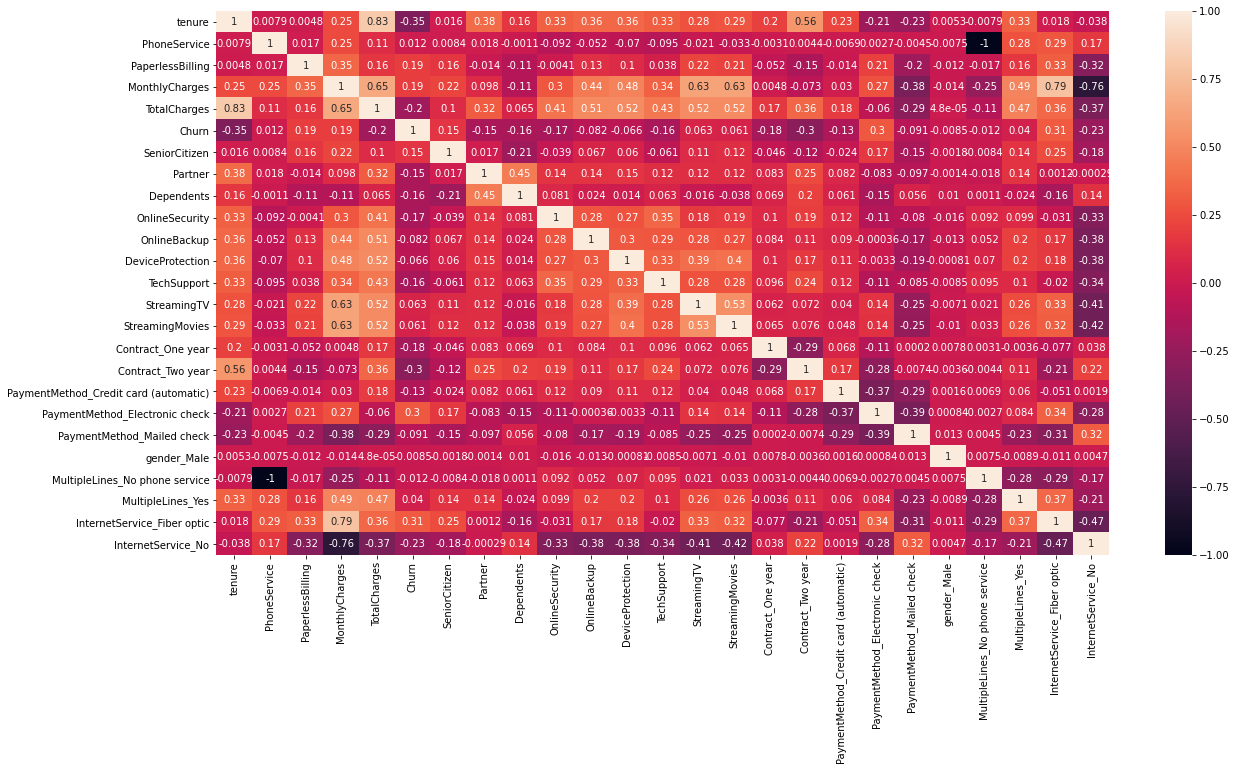

In [52]:
plt.figure(figsize=(20,10))

sns.heatmap(telecom.corr(), annot=True)
plt.show()

#### Running the first model

In [53]:
# logistic regression using statsmodel

logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Sun, 17 Apr 2022   Deviance:                       4009.4
Time:                        13:52:04   Pearson chi2:                 6.07e+03
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.3085      0.773     -2.986      0.003      -3.824      -0.793
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                             -0.6789      0.090     -7.510      0.000      -0.856      -0.502
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
OnlineSecurity                           -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup                              0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection                          0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport                              -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV                               0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies                           0.8484      0.396      2.143      0.032       0.072       1.624
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_No phone service           -1.6296      0.776     -2.101      0.036      -3.150      -0.109
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
=========================================================================================================
"""

## Feature selection using RFE

In [54]:
logreg = LogisticRegression()

In [56]:
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [57]:
# Columns selected by RFE

col = X_train.columns[rfe.support_]
col

Index(['tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'SeniorCitizen', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No'],
      dtype='object')

In [266]:
# Columns not selected by RFE

X_train.columns[~rfe.support_]

Index(['PhoneService', 'Partner', 'Dependents', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'PaymentMethod_Electronic check',
       'gender_Male', 'MultipleLines_No phone service'],
      dtype='object')

#### Building our 2nd model

In [269]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Sat, 16 Apr 2022   Deviance:                       4022.2
Time:                        14:45:29   Pearson chi2:                 6.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2462      0.189    -11.879      0.000      -2.617      -1.876
tenure                                   -1.5596      0.187     -8.334      0.000      -1.926      -1.193
PaperlessBilling                          0.3436      0.090      3.832      0.000       0.168       0.519
MonthlyCharges                           -0.9692      0.199     -4.878      0.000      -1.359      -0.580
TotalCharges                              0.7421      0.197      3.764      0.000       0.356       1.128
SeniorCitizen                             0.4296      0.100      4.312      0.000       0.234       0.625
TechSupport                              -0.2408      0.109     -2.210      0.027      -0.454      -0.027
StreamingTV                               0.5796      0.114      5.102      0.000       0.357       0.802
StreamingMovies                           0.4665      0.111      4.197      0.000       0.249       0.684
Contract_One year                        -0.6830      0.128     -5.342      0.000      -0.934      -0.432
Contract_Two year                        -1.2931      0.211     -6.138      0.000      -1.706      -0.880
PaymentMethod_Credit card (automatic)    -0.3724      0.113     -3.308      0.001      -0.593      -0.152
PaymentMethod_Mailed check               -0.3723      0.111     -3.345      0.001      -0.591      -0.154
MultipleLines_Yes                         0.3779      0.104      3.640      0.000       0.174       0.581
InternetService_Fiber optic               1.5865      0.216      7.342      0.000       1.163       2.010
InternetService_No                       -1.6897      0.216     -7.830      0.000      -2.113      -1.267
=========================================================================================================
"""

In [277]:
# Getting the prediction values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

879     0.192642
5790    0.275624
6498    0.599507
880     0.513571
2784    0.648233
3874    0.414846
5387    0.431184
6623    0.801788
4465    0.228194
5364    0.504575
dtype: float64

In [278]:
# Reshaping the y_train data

y_train_pred = y_train_pred.values.reshape(-1)

In [280]:
y_train_pred[:10]

array([0.19264205, 0.27562384, 0.59950707, 0.51357126, 0.64823272,
       0.41484553, 0.43118361, 0.80178789, 0.22819404, 0.50457542])

In [283]:
# Creating a data frame with actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({"Churn":y_train.values, "Churn_Prob":y_train_pred})
y_train_pred_final["CustID"] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.192642,879
1,0,0.275624,5790
2,1,0.599507,6498
3,1,0.513571,880
4,1,0.648233,2784


In [285]:
# Creating new column predicted with 1 if churn_porb>0.5 else 0

y_train_pred_final["predicted"] = y_train_pred_final["Churn_Prob"].apply(lambda x : 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.192642,879,0
1,0,0.275624,5790,0
2,1,0.599507,6498,1
3,1,0.513571,880,1
4,1,0.648233,2784,1


In [288]:
# Check Accuracy using Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted)
print(confusion)

[[3275  360]
 [ 574  713]]


In [289]:
# Checking overall accuracy

metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted)

0.8102397399431126

##### Till now the model seems to be OK. But we can't totally relay on this. So, we will check the VIF for further analysis

In [293]:
vif = pd.DataFrame()
vif["Features"] = X_train[col].columns
vif["VIF"] = [variance_inflation_factor(X_train[col].values, i) for i in range (X_train[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,MonthlyCharges,14.85
3,TotalCharges,10.42
0,tenure,7.38
13,InternetService_Fiber optic,5.61
14,InternetService_No,5.27
9,Contract_Two year,3.14
6,StreamingTV,2.79
7,StreamingMovies,2.79
1,PaperlessBilling,2.76
12,MultipleLines_Yes,2.38


There are a few variables with high VIF.Its best to drop these features as they are not helping much in prediction and unnecessarily making the model complex. Hence better to drop these features

In [294]:
# Droping MonthlyCharges

col = col.drop("MonthlyCharges")
col

Index(['tenure', 'PaperlessBilling', 'TotalCharges', 'SeniorCitizen',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mailed check', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No'],
      dtype='object')

#### Building 3rd model

In [295]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2023.1
Date:                Sat, 16 Apr 2022   Deviance:                       4046.2
Time:                        15:25:43   Pearson chi2:                 5.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.5971      0.130    -12.296      0.000      -1.852      -1.343
tenure                                   -1.3286      0.180     -7.401      0.000      -1.681      -0.977
PaperlessBilling                          0.3533      0.089      3.958      0.000       0.178       0.528
TotalCharges                              0.4347      0.186      2.340      0.019       0.071       0.799
SeniorCitizen                             0.4569      0.099      4.601      0.000       0.262       0.652
TechSupport                              -0.4371      0.101     -4.307      0.000      -0.636      -0.238
StreamingTV                               0.2881      0.096      2.996      0.003       0.100       0.477
StreamingMovies                           0.1944      0.096      2.031      0.042       0.007       0.382
Contract_One year                        -0.7289      0.127     -5.729      0.000      -0.978      -0.480
Contract_Two year                        -1.3277      0.210     -6.322      0.000      -1.739      -0.916
PaymentMethod_Credit card (automatic)    -0.3870      0.112     -3.442      0.001      -0.607      -0.167
PaymentMethod_Mailed check               -0.3618      0.110     -3.274      0.001      -0.578      -0.145
MultipleLines_Yes                         0.1700      0.094      1.814      0.070      -0.014       0.354
InternetService_Fiber optic               0.6888      0.109      6.297      0.000       0.474       0.903
InternetService_No                       -0.9555      0.156     -6.120      0.000      -1.262      -0.649
=========================================================================================================
"""

As we can see "MultipleLines_Yes" has high P-value, but for now we will keep this as it is and will move on to make prediction

In [296]:
# Predicting the value on train set again

y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [297]:
y_train_pred[:10]

array([0.22790197, 0.22864388, 0.67489226, 0.61586836, 0.66226032,
       0.41819928, 0.28813321, 0.7951366 , 0.17433167, 0.51908788])

In [298]:
# Replacing the churn probability with new pprbability value

y_train_pred_final["Churn_Prob"] = y_train_pred

In [299]:
y_train_pred_final["predicted"] = y_train_pred_final["Churn_Prob"].apply(lambda x : 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.227902,879,0
1,0,0.228644,5790,0
2,1,0.674892,6498,1
3,1,0.615868,880,1
4,1,0.662260,2784,1


In [300]:
# Checking overall accuracy

metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted)

0.8057700121901666

The overall accuracy hasn't dropped much

In [301]:
# Checking the VIF again

vif = pd.DataFrame()
vif["Features"] = X_train[col].columns
vif["VIF"] = [variance_inflation_factor(X_train[col].values, i) for i in range (X_train[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,TotalCharges,7.46
0,tenure,6.90
8,Contract_Two year,3.07
12,InternetService_Fiber optic,2.96
6,StreamingMovies,2.62
5,StreamingTV,2.59
1,PaperlessBilling,2.55
13,InternetService_No,2.44
11,MultipleLines_Yes,2.27
4,TechSupport,1.95


So, in this case if the business says that the "Total Charges" feature is important and they definately want this in their model. Then we will not drop "Total Charges"

But for now lets go ahead and drop "Total Charges"

In [303]:
# Droping TotalCharges

col = col.drop("TotalCharges")
col

Index(['tenure', 'PaperlessBilling', 'SeniorCitizen', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mailed check', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No'],
      dtype='object')

#### Building the 4th model

In [304]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.9
Date:                Sat, 16 Apr 2022   Deviance:                       4051.9
Time:                        19:39:04   Pearson chi2:                 5.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.6577      0.127    -13.094      0.000      -1.906      -1.410
tenure                                   -0.9426      0.065    -14.480      0.000      -1.070      -0.815
PaperlessBilling                          0.3455      0.089      3.877      0.000       0.171       0.520
SeniorCitizen                             0.4597      0.100      4.613      0.000       0.264       0.655
TechSupport                              -0.4046      0.101     -4.019      0.000      -0.602      -0.207
StreamingTV                               0.3390      0.094      3.619      0.000       0.155       0.523
StreamingMovies                           0.2428      0.093      2.598      0.009       0.060       0.426
Contract_One year                        -0.7218      0.127     -5.702      0.000      -0.970      -0.474
Contract_Two year                        -1.2987      0.208     -6.237      0.000      -1.707      -0.891
PaymentMethod_Credit card (automatic)    -0.3874      0.113     -3.442      0.001      -0.608      -0.167
PaymentMethod_Mailed check               -0.3307      0.110     -3.020      0.003      -0.545      -0.116
MultipleLines_Yes                         0.2097      0.092      2.279      0.023       0.029       0.390
InternetService_Fiber optic               0.8052      0.097      8.272      0.000       0.614       0.996
InternetService_No                       -0.9726      0.155     -6.261      0.000      -1.277      -0.668
=========================================================================================================
"""

In [305]:
# Predicting the value on train set again

y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [306]:
y_train_pred[:10]

array([0.24581699, 0.26536078, 0.66940978, 0.63097033, 0.68291606,
       0.39952622, 0.27582791, 0.79816753, 0.19878625, 0.52911878])

In [307]:
# Replacing the churn probability with new pprbability value

y_train_pred_final["Churn_Prob"] = y_train_pred

In [308]:
y_train_pred_final["predicted"] = y_train_pred_final["Churn_Prob"].apply(lambda x : 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.245817,879,0
1,0,0.265361,5790,0
2,1,0.669410,6498,1
3,1,0.630970,880,1
4,1,0.682916,2784,1


In [311]:
# Let's take a look on confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
confusion

array([[3278,  357],
       [ 597,  690]], dtype=int64)

In [309]:
# Checking overall accuracy

metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted)

0.8061763510767981

The overall accuracy hasn't dropped much

In [310]:
# Checking the VIF again

vif = pd.DataFrame()
vif["Features"] = X_train[col].columns
vif["VIF"] = [variance_inflation_factor(X_train[col].values, i) for i in range (X_train[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
7,Contract_Two year,2.98
11,InternetService_Fiber optic,2.67
5,StreamingMovies,2.54
4,StreamingTV,2.51
1,PaperlessBilling,2.45
10,MultipleLines_Yes,2.24
0,tenure,2.04
12,InternetService_No,2.03
3,TechSupport,1.92
6,Contract_One year,1.78


#### This is the final model because both the P-Value and the VIF seems OK.

## Metrics beyond simple accuracy

#### All though, the accuracy metric shows that the model is 80% correct, but we can't always relay on this. So, we will check two most commonly used metrics i.e.
1. Sensitivity
2. Specificity

In [312]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [317]:
# Checking the sensitivity of our logistic model

TP/float(TP+FN)

0.5361305361305362

In [315]:
# Checking the specificity of our logistic model

TN/float(TN+FP)

0.9017881705639614

In [316]:
# Calculating False positive rate - predicting churn when the customer does not have churned

FP/float(TN+FP)

0.09821182943603851

In [318]:
# Positive predicted value

TP/float(TP+FP)

0.6590257879656161

In [319]:
# Negative predicted value

TN/float(TN+FN)

0.8459354838709677

## Plotting the ROC Curve

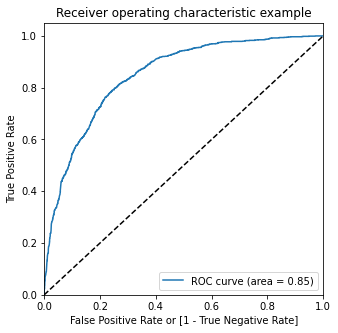

In [320]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

## Finding the Optimal Threshold Point

##### Optimal cutoff probability is where we get balanced sensitivity and specificity

In [322]:
# Creating columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Churn_Prob.map(lambda x : 1 if x>i else 0)

y_train_pred_final.head()


,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.245817,879,0,1,1,1,0,0,0,0,0,0,0
1,0,0.265361,5790,0,1,1,1,0,0,0,0,0,0,0
2,1,0.669410,6498,1,1,1,1,1,1,1,1,0,0,0
3,1,0.630970,880,1,1,1,1,1,1,1,1,0,0,0
4,1,0.682916,2784,1,1,1,1,1,1,1,1,0,0,0


In [323]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.261479  1.000000  0.000000
0.1   0.1  0.614994  0.943279  0.498762
0.2   0.2  0.721861  0.846154  0.677854
0.3   0.3  0.770012  0.776224  0.767813
0.4   0.4  0.790532  0.636364  0.845117
0.5   0.5  0.806176  0.536131  0.901788
0.6   0.6  0.798050  0.380730  0.945805
0.7   0.7  0.776310  0.196581  0.981568
0.8   0.8  0.747867  0.041181  0.998074
0.9   0.9  0.738521  0.000000  1.000000


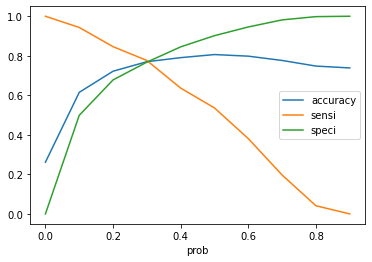

In [324]:
# Plotting accuracy, sensitivity and specificity for various probabilities

cutoff_df.plot.line(x="prob", y=["accuracy", "sensi", "speci"])
plt.show()

#### Form the above curve, we will consider 0.3 as our threshold

In [325]:
# Creating new column predicted with 1 if churn_porb>0.5 else 0

y_train_pred_final["final_predicted"] = y_train_pred_final["Churn_Prob"].apply(lambda x : 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.245817,879,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.265361,5790,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.669410,6498,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.630970,880,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.682916,2784,1,1,1,1,1,1,1,1,0,0,0,1


In [326]:
# Checking the over all accuracy

metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7700121901665989

### Now, apart from sensitivity and specificity, there are two more metrics that are widely used , they're known as 'Precision' and 'Recall'.

## Precision and Recall

In [330]:
# Checking the confusion metrix again - confusion matrix on OLD cutoff

confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
confusion

array([[3278,  357],
       [ 597,  690]], dtype=int64)

#### Precision

In [332]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6590257879656161

#### Recall

In [333]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5361305361305362

In [335]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.6590257879656161

In [336]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.5361305361305362

### Precision and recall tradeoff

In [338]:
p, r, threshold = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

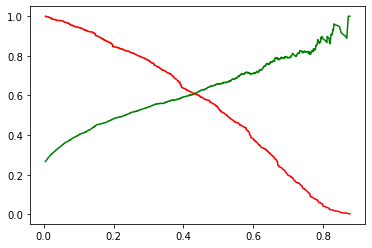

In [339]:
plt.plot(threshold, p[:-1], "g-")
plt.plot(threshold, r[:-1], "r-")
plt.show()

## Making Prediction on Test DataSet

In [340]:
# scaling the test data set

X_test[["tenure", "MonthlyCharges", "TotalCharges"]] = scaler.transform(X_test[["tenure", "MonthlyCharges", "TotalCharges"]])
X_test.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No
942,-0.347623,1,1,0.499951,-0.128378,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
3730,0.999203,1,1,1.319685,1.600302,0,1,0,0,1,1,0,1,1,0,0,1,0,0,0,0,1,1,0
1761,1.040015,1,1,-1.342374,-0.343297,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1
2283,-1.286319,1,1,0.223935,-0.979170,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
1872,0.346196,1,0,-1.500335,-0.656086,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [341]:
# Selecting only those column which is present in our model

X_test = X_test[col]
X_test.head()

,tenure,PaperlessBilling,SeniorCitizen,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No
942,-0.347623,1,0,0,0,1,0,0,1,0,0,1,0
3730,0.999203,1,0,0,1,1,0,0,1,0,1,1,0
1761,1.040015,1,0,0,0,0,0,1,1,0,1,0,1
2283,-1.286319,1,0,0,0,0,0,0,0,1,0,1,0
1872,0.346196,0,0,0,0,0,0,1,0,0,0,0,1


In [342]:
# Adding constant

X_test_sm = sm.add_constant(X_test)

In [343]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

942     0.419725
3730    0.260232
1761    0.008650
2283    0.592626
1872    0.013989
1970    0.692893
2532    0.285289
1616    0.008994
2485    0.602307
5914    0.145153
dtype: float64

In [348]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
942,0.419725
3730,0.260232
1761,0.008650
2283,0.592626
1872,0.013989


In [350]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Churn
942,0
3730,1
1761,0
2283,1
1872,0


In [351]:
y_test_df["CustID"] = y_test_df.index
y_test_df.head()

,Churn,CustID
942,0,942
3730,1,3730
1761,0,1761
2283,1,2283
1872,0,1872


In [352]:
# Removing index from both the data frame

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [353]:
y_test_df.head()

,Churn,CustID
0,0,942
1,1,3730
2,0,1761
3,1,2283
4,0,1872


In [354]:
y_pred_1.head()

,0
0,0.419725
1,0.260232
2,0.008650
3,0.592626
4,0.013989


In [355]:
# Appending both the data frames -  to get the same format as y_train_final data set

y_pred_final = pd.concat([y_pred_1, y_test_df], axis=1)

In [356]:
y_pred_final.head()

,0,Churn,CustID
0,0.419725,0,942
1,0.260232,1,3730
2,0.008650,0,1761
3,0.592626,1,2283
4,0.013989,0,1872


In [357]:
# Renaming the columns

y_pred_final = y_pred_final.rename(columns={0: "Churn_Prob"})

In [358]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(["CustID", "Churn", "Churn_Prob"], axis=1)

In [359]:
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,942,0,0.419725
1,3730,1,0.260232
2,1761,0,0.008650
3,2283,1,0.592626
4,1872,0,0.013989


In [360]:
y_pred_final["final_predicted"] = y_pred_final.Churn_Prob.map(lambda x : 1 if x>0.3 else 0)

In [361]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,942,0,0.419725,1
1,3730,1,0.260232,0
2,1761,0,0.008650,0
3,2283,1,0.592626,1
4,1872,0,0.013989,0


In [362]:
# Checking the over all accuracy

metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7407582938388626

In [363]:
# Checking the confusion matrix

confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted)
confusion2

array([[1144,  384],
       [ 163,  419]], dtype=int64)

In [365]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [366]:
# Checking Sensitivity

TP/float(TP+FN)

0.7199312714776632

In [368]:
# Checking specificity

TN/float(TN+FP)

0.7486910994764397

## END